## Importing basic libraries

In [83]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing clean data

In [84]:
data = pd.read_csv("cleaned_data.csv")

In [85]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,0,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,0,0,0,0,0,0,0


## Plotting bar graph for target variable

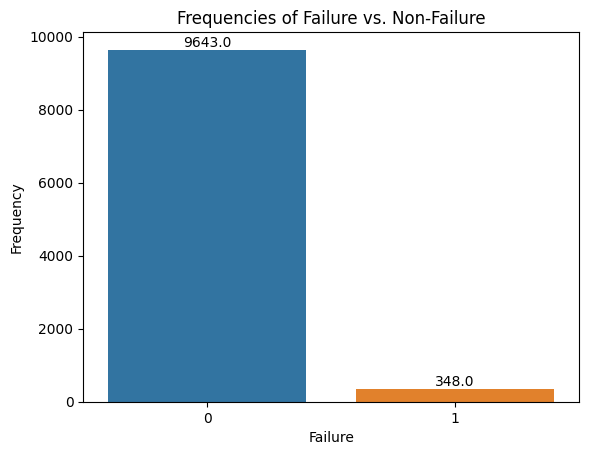

In [86]:
sns.countplot(x='Machine failure', data=data)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

Now, we drop all the non-numeric columns and consider only the numeric ones. The final data frame is name 'df'.

In [87]:
df = data
df = df.drop("UDI", axis=1, errors="ignore")
df = df.drop("Product ID", axis=1, errors="ignore")
df = df.drop("Type", axis=1, errors="ignore")
df = df.drop("TWF", axis=1, errors="ignore")
df = df.drop("HDF", axis=1, errors="ignore")
df = df.drop("PWF", axis=1, errors="ignore")
df = df.drop("OSF", axis=1, errors="ignore")
df = df.drop("RNF", axis=1, errors="ignore")
df.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,0,0
2,298.1,308.5,1498,49.4,0,0
3,298.2,308.6,1433,39.5,0,0
4,298.2,308.7,1408,40.0,0,0
5,298.1,308.6,1425,41.9,0,0
6,298.1,308.6,1558,42.4,0,0
7,298.1,308.6,1527,40.2,0,0
8,298.3,308.7,1667,28.6,0,0
9,298.5,309.0,1741,28.0,0,0


## Binary Classification

### Train test split

In [88]:
from sklearn.model_selection import train_test_split

X_binary = df.drop("Machine failure", axis=1)
y_binary = df["Machine failure"]

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_binary_train.shape, X_binary_test.shape, y_binary_train.shape, y_binary_test.shape

((7992, 5), (1999, 5), (7992,), (1999,))

We now check the data for duplicate values using duplicated() function.

In [89]:
duplicate = df[df.duplicated(keep = "first")]
duplicate.shape

(0, 6)

We also check for the presence of missing values in any rows within the dataset.

In [90]:
df.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

### Scaling

We perform scaling to make sure the prediction is performed on the training data, so that we avoid data leakage to the test dataset. 

In [91]:
from sklearn.preprocessing import StandardScaler

to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
X_binary_train[to_scale] = sc.fit_transform(X_binary_train[to_scale])
X_binary_test[to_scale] = sc.transform(X_binary_test[to_scale])

We can check that all the features now have a mean of 0 and standard deviation of 1.

In [92]:
X_binary_train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7.992000e+03,7.992000e+03,7.992000e+03,7.992000e+03,7.992000e+03
mean,2.026229e-14,-3.841661e-15,-1.298039e-16,-3.342894e-16,-1.102444e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.351698e+00,-2.900232e+00,-1.907229e+00,-3.606872e+00,-1.700671e+00
25%,-8.502625e-01,-8.110693e-01,-6.453024e-01,-6.737703e-01,-8.687041e-01
50%,5.059894e-02,6.503126e-02,-1.946144e-01,1.162812e-02,1.035500e-02
75%,7.512690e-01,7.389548e-01,4.081808e-01,6.768678e-01,8.580191e-01
max,2.252705e+00,2.558548e+00,7.523418e+00,3.690605e+00,2.270793e+00


In [93]:
X_binary_test.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.014346,0.006337,0.007288,0.000374,-0.031115
std,1.005442,1.000464,1.050100,1.023859,0.996408
min,-2.301650,-2.765448,-2.087504,-3.647190,-1.700671
25%,-0.850263,-0.811069,-0.665020,-0.693929,-0.884402
50%,0.050599,-0.002361,-0.211515,0.021708,-0.052435
75%,0.801317,0.738955,0.430715,0.727265,0.826624
max,2.202657,2.558548,7.591021,3.206794,2.239398


### Model training

As the classes are highly imbalanced, accuracy is not the best metric to use. Let's focus on precison and recall as well.

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

Let's define a few different models , which enables us to compare. So we define Logistic regression, Decison tree and Random forest models.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([lr, dtc, rfc],
                     ["Logistic Regression", "Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, X_binary_train, X_binary_test, y_binary_train, y_binary_test)

In [96]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

,ACCURACY,PRECISION,RECALL,F1-SCORE
Model,,,,
Logistic Regression,0.967484,0.937500,0.189873,0.315789
Decision Tree,0.968484,0.611111,0.556962,0.582781
Random Forest,0.980990,0.918367,0.569620,0.703125


- Random Forest appears to outperform Logistic Regression and Decision Tree in terms of accuracy, precision, recall, and F1-score.
- Logistic Regression has high precision but low recall, suggesting it may be conservative in predicting positive cases.
- Decision Tree has lower precision compared to Logistic Regression but better recall.
- Random Forest provides a good balance between precision and recall, resulting in a higher F1-score.